## Entendendo os dados
- Dataset disponível em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

### Descrição das colunas

1. **NU_INSCRICAO**: Número de inscrição do participante.
2. **NU_ANO**: Ano de referência do dado.
3. **TP_FAIXA_ETARIA**: Faixa etária do participante.
4. **TP_SEXO**: Gênero do participante (M/F).
5. **TP_ESTADO_CIVIL**: Estado civil do participante (codificado).
6. **TP_COR_RACA**: Cor ou raça declarada do participante.
7. **TP_NACIONALIDADE**: Nacionalidade do participante.
8. **TP_ST_CONCLUSAO**: Situação de conclusão do ensino médio.
9. **TP_ANO_CONCLUIU**: Ano de conclusão do ensino médio.
10. **TP_ESCOLA**: Tipo de escola (pública ou privada).

11. **TP_ENSINO**: Tipo de ensino frequentado no ensino médio.
12. **IN_TREINEIRO**: Indica se o participante é treineiro.
13. **CO_MUNICIPIO_ESC** e **NO_MUNICIPIO_ESC**: Código e nome do município da escola.
14. **CO_UF_ESC** e **SG_UF_ESC**: Código e sigla do estado da escola.
15. **TP_DEPENDENCIA_ADM_ESC**: Dependência administrativa da escola (pública, privada, etc.).
16. **TP_LOCALIZACAO_ESC**: Localização da escola (urbana ou rural).
17. **TP_SIT_FUNC_ESC**: Situação funcional da escola.
18. **CO_MUNICIPIO_PROVA** e **NO_MUNICIPIO_PROVA**: Código e nome do município da prova.
19. **CO_UF_PROVA** e **SG_UF_PROVA**: Código e sigla do estado da prova.

20. **TP_PRESENCA_* (CN, CH, LC, MT)**: Presença nas provas de Ciências da Natureza (CN), Ciências Humanas (CH), Linguagens e Códigos (LC) e Matemática (MT).
21. **NU_NOTA_* (CN, CH, LC, MT)**: Notas nas respectivas áreas do conhecimento.
22. **TX_RESPOSTAS_* (CN, CH, LC, MT)**: Respostas do participante em cada prova.
23. **TP_LINGUA**: Idioma escolhido para a prova de linguagens (Português ou outra língua estrangeira).
24. **TX_GABARITO_* (CN, CH, LC, MT)**: Gabarito oficial das provas.

25. **TP_STATUS_REDACAO**: Situação da redação (anulada, válida, etc.).
26. **NU_NOTA_COMP1 a NU_NOTA_COMP5**: Notas por competência na redação.
27. **NU_NOTA_REDACAO**: Nota total da redação.

28. **Q001 a Q025**: Questionário socioeconômico e demográfico, com informações sobre renda, escolaridade dos pais, posse de bens, entre outros.

In [ ]:
import pandas as pd

df = pd.read_csv(r'data\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv', sep=';', encoding='iso-8859-1', on_bad_lines='skip')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [2]:
df.shape

(3933955, 76)

## Estatísticas das pontuações

In [3]:
score_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
pd.set_option('display.float_format', '{:,.1f}'.format)

score_summary = df[score_columns].describe()
score_summary

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,"2,692,427.0","2,822,643.0","2,822,643.0","2,692,427.0","2,822,643.0"
mean,495.8,523.4,518.1,533.8,617.8
std,87.9,88.6,75.5,131.6,214.6
min,0.0,0.0,0.0,0.0,0.0
25%,440.5,467.8,471.4,431.2,500.0
50%,493.9,530.4,523.1,523.6,620.0
75%,551.2,584.9,570.3,630.1,780.0
max,868.4,823.0,820.8,958.6,"1,000.0"


In [4]:
valores_faltantes = df.isnull().sum()
valores_faltantes[valores_faltantes > 0]

TP_ENSINO                 2594874
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
CO_UF_ESC                 2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
TP_SIT_FUNC_ESC           2975449
CO_PROVA_CN               1241528
CO_PROVA_CH               1111312
CO_PROVA_LC               1111312
CO_PROVA_MT               1241528
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
TX_RESPOSTAS_CN           1241528
TX_RESPOSTAS_CH           1111312
TX_RESPOSTAS_LC           1111312
TX_RESPOSTAS_MT           1241528
TX_GABARITO_CN            1241528
TX_GABARITO_CH            1111312
TX_GABARITO_LC            1111312
TX_GABARITO_MT            1241528
TP_STATUS_REDACAO         1111312
NU_NOTA_COMP1             1111312
NU_NOTA_COMP2             1111312
NU_NOTA_COMP3             1111312
NU_NOTA_COMP4             1111312
NU_NOTA_COMP5 

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_theme(style='whitegrid')

## Distribuições de frequência por pontuação

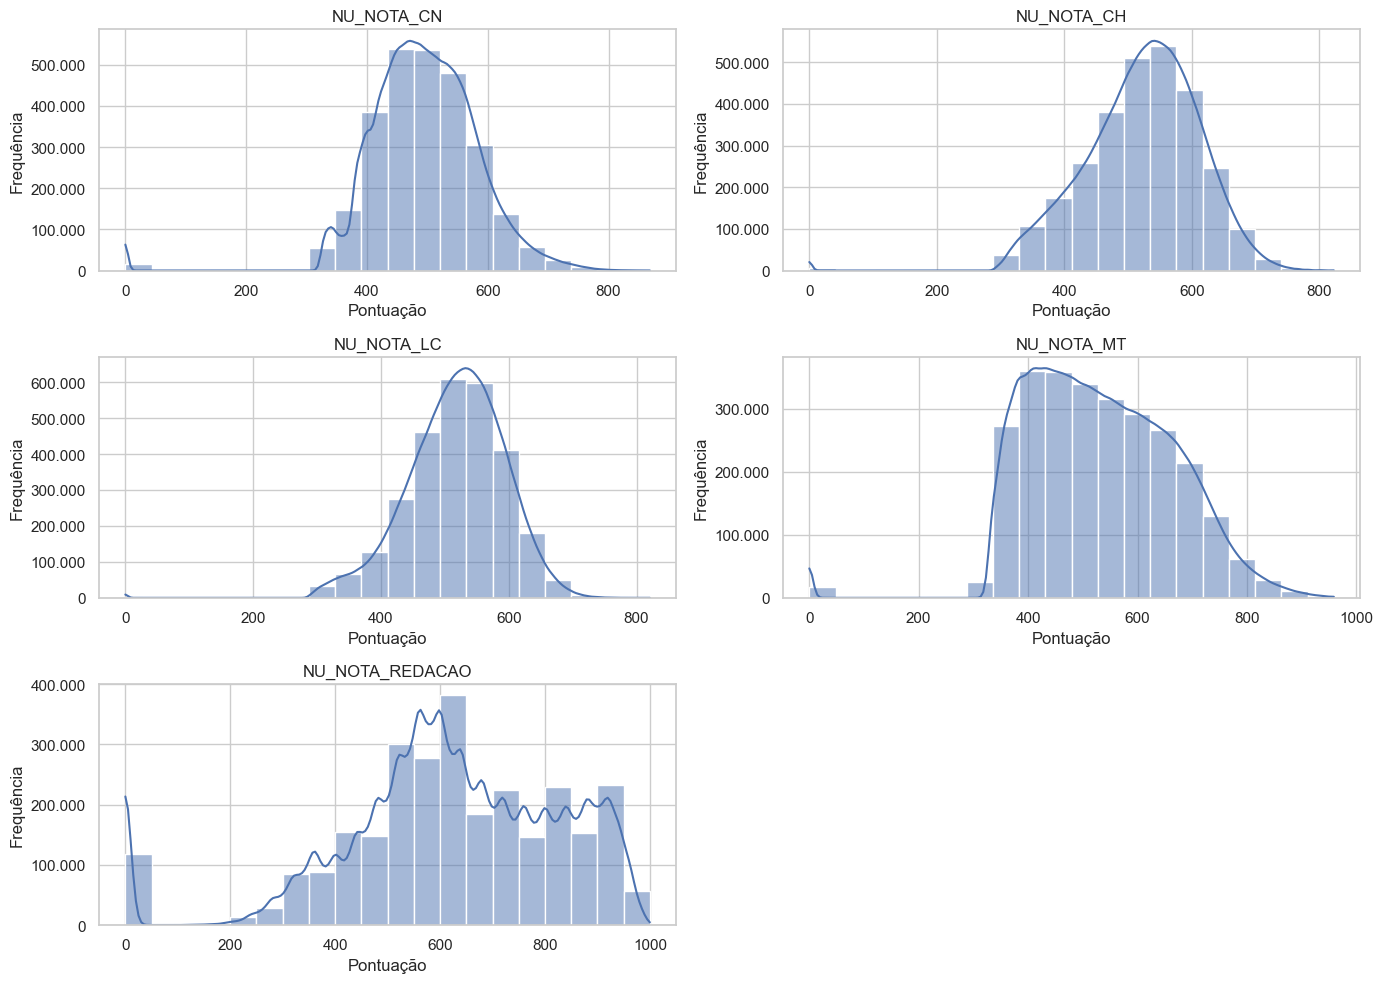

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(score_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f'{col}')
    plt.xlabel('Pontuação')
    plt.ylabel('Frequência')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

plt.tight_layout()
plt.show()

### 1. Distribuição Assimétrica
- A maioria das notas segue uma **distribuição assimétrica**, tendendo para a esquerda.
- Isso indica que grande parte dos candidatos obteve **notas médias ou abaixo da média**.
- Essa característica é especialmente evidente nas provas de **Matemática (NU_NOTA_MT)** e **Ciências da Natureza (NU_NOTA_CN)**.

### 2. Análise por Prova

##### **Matemática (NU_NOTA_MT)**
- A distribuição possui uma **cauda longa à direita**, sugerindo que poucos alunos obtiveram notas muito altas.
- A maior concentração está em **faixas de pontuação média e baixa**, indicando que essa foi uma das provas mais desafiadoras.

##### **Ciências da Natureza (NU_NOTA_CN) e Ciências Humanas (NU_NOTA_CH)**
- As distribuições apresentam maior **concentração no centro**, mas ainda levemente assimétricas.
- Isso indica que os desempenhos nessas áreas foram relativamente mais uniformes, com uma maior concentração em torno da média.

##### **Linguagens (NU_NOTA_LC)**
- A distribuição mostra maior **variabilidade nas notas**, mas a concentração também ocorre na faixa intermediária.
- Isso pode refletir a dificuldade da prova e a diversidade nas habilidades dos candidatos.

##### **Redação (NU_NOTA_REDAÇÃO)**
- A distribuição da redação apresenta **picos bem definidos**, especialmente próximo das pontuações máximas e mínimas.
- Isso sugere que houve muitos candidatos com notas **extremamente altas ou baixas**, possivelmente devido a critérios claros de correção.

### 3. Notas Baixas Frequentes
- Em todas as áreas, há um número significativo de candidatos com **pontuação próxima a zero**.
- Isso pode refletir desistências, dificuldades extremas ou falta de preparo.

### 4. Desempenho Geral
- A prova de **Matemática (NU_NOTA_MT)** apresenta o maior desvio na concentração de notas, com muitas notas baixas, reforçando que essa pode ter sido a área mais desafiadora.
- **Ciências Humanas** e **Ciências da Natureza** apresentam maior uniformidade, enquanto **Redação** tem padrões específicos.

## Comparações por Gênero

In [7]:
gender_distribution = df['TP_SEXO'].value_counts()
gender_distribution

TP_SEXO
F    2411185
M    1522770
Name: count, dtype: int64

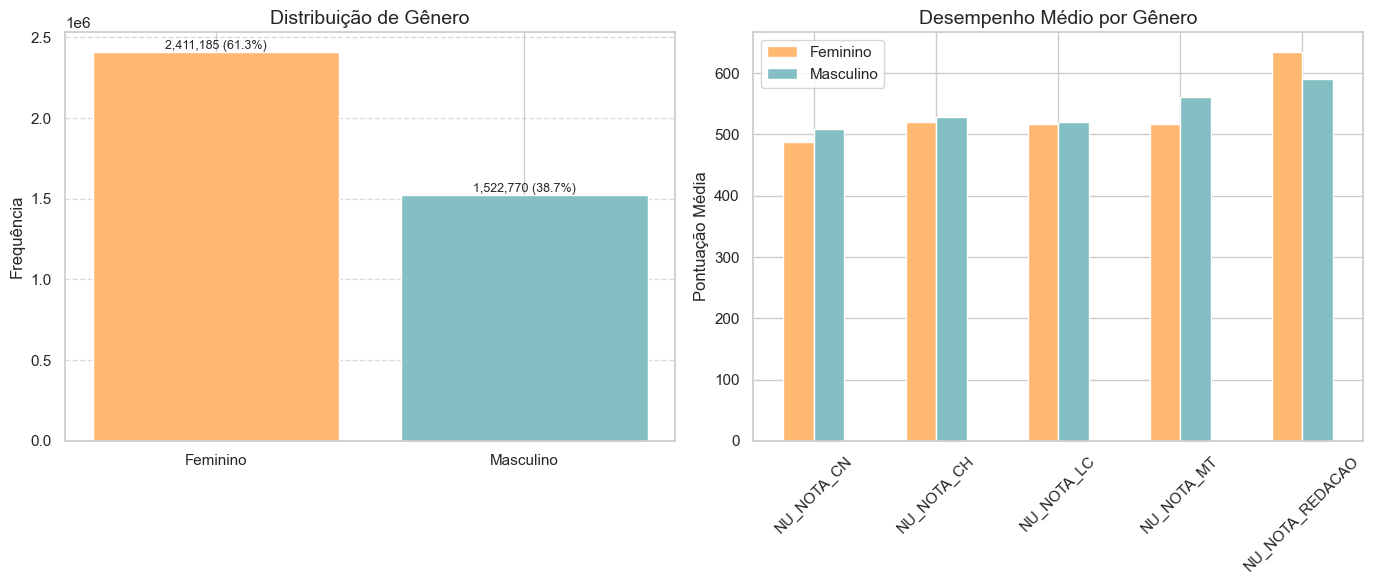

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1
gender_percent = (gender_distribution / gender_distribution.sum()) * 100
colors = ['#ffb870', '#84bfc3']
bars = axes[0].bar(gender_distribution.index, gender_distribution, color=colors)

for bar, count, percent in zip(bars, gender_distribution, gender_percent):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f"{count:,.0f} ({percent:.1f}%)",
                 ha='center', va='bottom', fontsize=9)

# Personalização
axes[0].set_title("Distribuição de Gênero", fontsize=14)
axes[0].set_ylabel("Frequência")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Feminino', 'Masculino'], rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Média
gender_scores = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

gender_scores.index = ['Feminino', 'Masculino']

# Subplot 2: Performance comparison by gender
gender_scores.T.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Desempenho Médio por Gênero', fontsize=14)
axes[1].set_ylabel('Pontuação Média')
axes[1].legend(labels=['Feminino', 'Masculino'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Mulheres apresentam uma maior participação em relação aos homens.
- Mulheres têm desempenho superior em Linguagens e Redação.
- Homens têm desempenho levemente melhor em Matemática.
- Ciências Humanas e Ciências da Natureza apresentam diferenças menores entre os gêneros.

## Comparações entre os tipos de escola

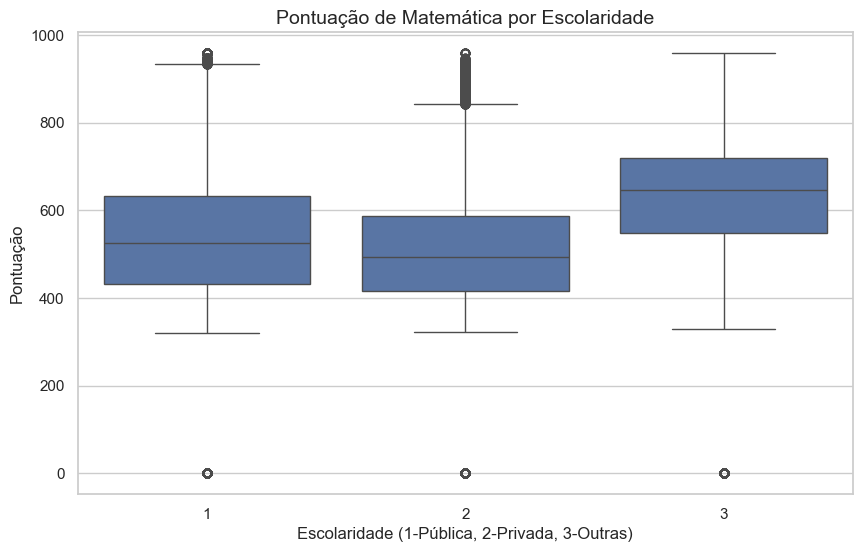

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_MT', data=df)
plt.title('Pontuação de Matemática por Escolaridade', fontsize=14)
plt.xlabel('Escolaridade (1-Pública, 2-Privada, 3-Outras)')
plt.ylabel('Pontuação')
plt.show()

- A pontuação mediana das "Outras Escolas" é ligeiramente superior em comparação às escolas públicas e privadas.
- A amplitude dos dados e o número de outliers são maiores nas escolas privadas, sugerindo maior diversidade no desempenho dos alunos.
- O tipo de escola parece influenciar as pontuações em Matemática, com alunos de "Outras Escolas" tendendo a apresentar desempenho superior.
- O maior número de outliers em escolas privadas pode ser um reflexo de uma maior heterogeneidade nas condições socioeconômicas ou na qualidade da educação.

## Desempenho médio por estado

In [10]:
geo_columns = ['SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
geo_data = df[geo_columns]

# Agrupar por estado (SG_UF_PROVA) e calcular a média das notas
regional_performance = geo_data.groupby('SG_UF_PROVA').mean()

# Ordenar os estados pela média da nota de redação
regional_performance_sorted = regional_performance.sort_values(by='NU_NOTA_REDACAO', ascending=False)
regional_performance_sorted = regional_performance_sorted.dropna()
regional_performance_sorted.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
SG_UF_PROVA,,,,,
MG,514.5,542.7,533.1,567.4,653.7
ES,509.0,535.8,527.3,556.0,637.8
SP,515.5,545.7,540.6,572.2,637.6
RJ,506.3,539.2,531.5,551.9,634.4
SC,510.5,542.2,535.0,561.9,632.5


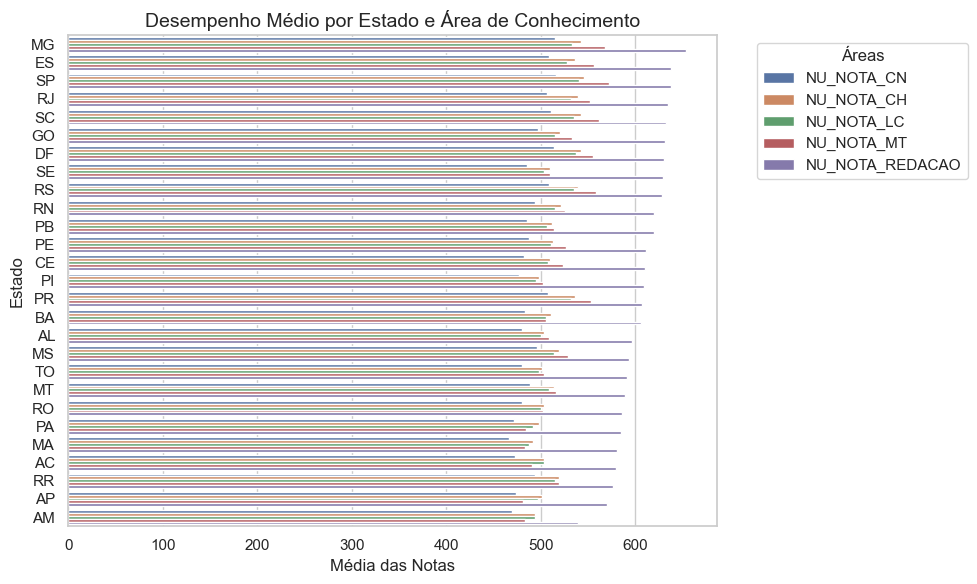

In [11]:
# Remover estados com NaN nos dados
regional_performance_cleaned = regional_performance_sorted.dropna()

# Resetar índice para facilitar o uso no gráfico
regional_performance_cleaned.reset_index(inplace=True)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=regional_performance_cleaned.melt(id_vars='SG_UF_PROVA', var_name='Área', value_name='Média'),
    x='Média',
    y='SG_UF_PROVA',
    hue='Área'
)

# Personalização
plt.title("Desempenho Médio por Estado e Área de Conhecimento", fontsize=14)
plt.xlabel("Média das Notas")
plt.ylabel("Estado")
plt.legend(title='Áreas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Estados com melhor desempenho médio
- **Minas Gerais (MG)** e **São Paulo (SP)** têm as melhores médias nas provas em geral, com destaque para Matemática e Redação.
- **Espírito Santo (ES)** também apresenta médias consistentes em todas as áreas, especialmente em Ciências Humanas.

### Estados com pior desempenho médio
- **Amapá (AP)** e **Amazonas (AM)** têm as médias mais baixas em quase todas as áreas, especialmente em Matemática e Redação.
- A Redação no **Amazonas (AM)** tem a menor média nacional.

### Disparidades regionais
##### Região Sudeste
- Apresenta o melhor desempenho médio entre as regiões, com destaque para Minas Gerais (MG) e São Paulo (SP).
- Consistência em todas as áreas, indicando uma possível relação com fatores socioeconômicos e acesso à educação de maior qualidade.

##### Região Norte
- Estados do Norte, como Amazonas (AM), Amapá (AP), e Maranhão (MA), apresentam as médias mais baixas em quase todas as áreas.
- Isso pode estar relacionado a limitações no acesso à educação de qualidade, infraestrutura escolar e desigualdade socioeconômica.

##### Região Nordeste
- Embora tenha algumas notas baixas, estados como Ceará (CE) e Pernambuco (PE) mostram desempenho relativamente bom, especialmente em Redação.

## Análise de Impacto da Cor/Raça

In [12]:
df['TP_COR_RACA'].unique()

array([1, 3, 2, 0, 5, 4], dtype=int64)

0: Não declarado
1: Branca
2: Preta
3: Parda
4: Amarela
5: Indígena

In [13]:
race_scores = df.groupby('TP_COR_RACA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
race_scores.index = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
race_scores = race_scores.sort_values(by='NU_NOTA_REDACAO', ascending=False)
race_scores

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Branca,516.5,544.8,537.6,571.3,660.8
Amarela,497.5,515.9,510.9,537.8,603.9
Não Declarado,500.4,527.4,519.8,535.4,597.6
Parda,480.7,507.5,503.7,507.5,589.2
Preta,474.7,504.9,501.8,492.9,572.5
Indígena,453.1,476.9,474.1,462.4,511.9


<Figure size 1200x600 with 0 Axes>

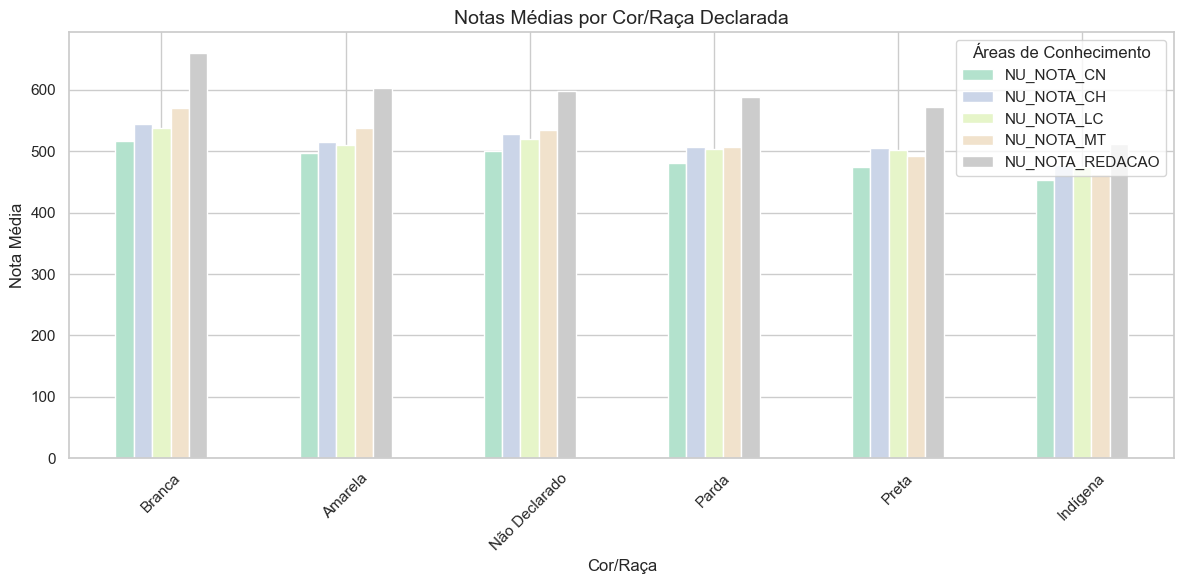

In [14]:
# Visualização da análise de cor/raça
plt.figure(figsize=(12, 6))
race_scores.plot(kind='bar', figsize=(12, 6), colormap='Pastel2')
plt.title('Notas Médias por Cor/Raça Declarada', fontsize=14)
plt.xlabel('Cor/Raça')
plt.ylabel('Nota Média')
plt.xticks(rotation=45)
plt.legend(title='Áreas de Conhecimento')
plt.tight_layout()
plt.show()

#### Redação
- Todos os grupos apresentam as maiores médias nesta área, o que pode ser resultado de melhores práticas de ensino e foco na escrita.
- Branco têm um desempenho significativamente superior em relação a outros grupos.
#### Matemática e Ciências da Natureza
- Grupos como Indígenas, Pretos e Pardos têm desempenho abaixo de 500 pontos, indicando maior dificuldade nessas áreas.
- Brancos e Amarelos mostram maior domínio nessas disciplinas.

## Correlação Entre Variáveis Socioeconômicas e Desempenho nas Provas

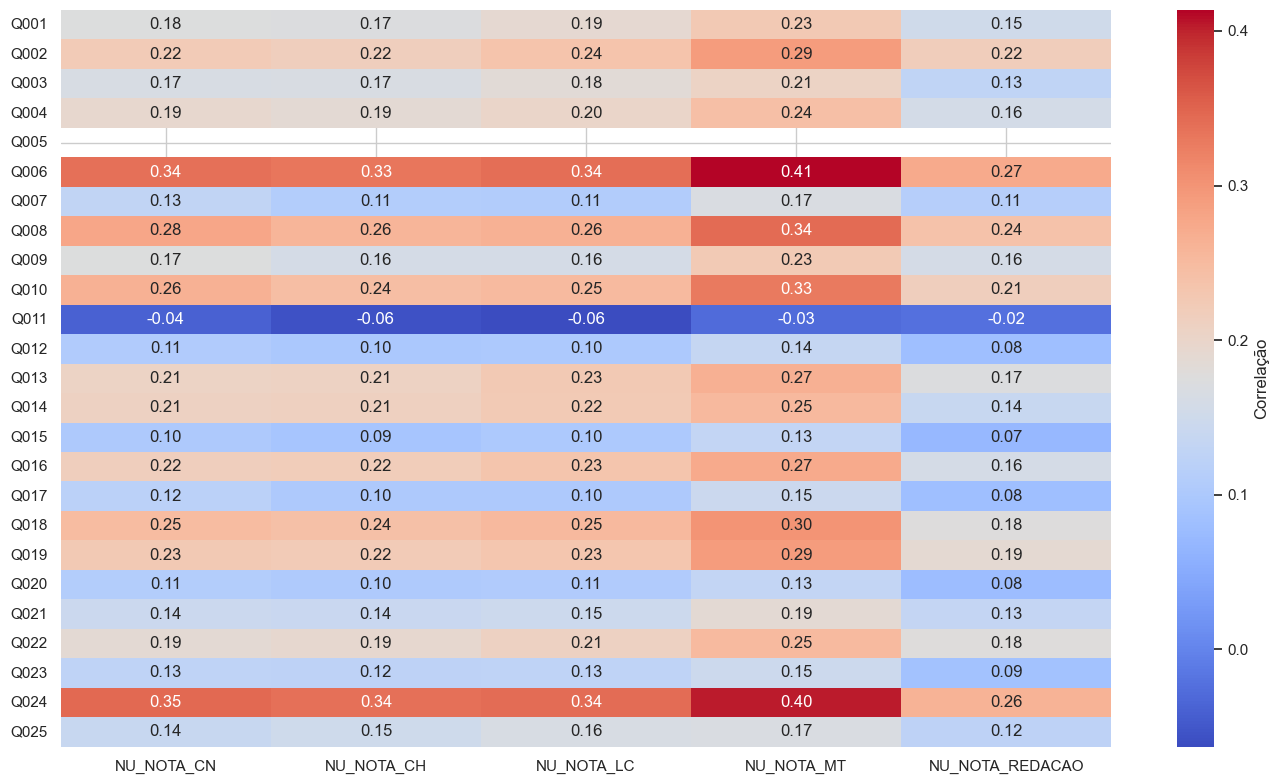

In [15]:
# Para simplificar, calcularemos as correlações entre as variáveis socioeconômicas (Q001–Q025) e as notas
socioecon_columns = [col for col in df.columns if 'Q0' in col]
score_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Mapeamento das variáveis categóricas (Q001–Q025) para valores numéricos para análise de correlação
# Atribuindo um valor numérico a cada categoria ('A', 'B', 'C', etc.)
socioecon_mapping = {letter: idx for idx, letter in enumerate('ABCDEFGHIJKLMN', 1)}
data_mapped = df.copy()
for col in socioecon_columns:
    data_mapped[col] = data_mapped[col].map(socioecon_mapping)

# Recalcular as correlações com os dados mapeados
socioecon_scores_corr = data_mapped[socioecon_columns + score_columns].corr().loc[socioecon_columns, score_columns]

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(socioecon_scores_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlação'})
plt.tight_layout()
plt.show()

- Q001: Até que série seu pai, ou o homem responsável por você, estudou?
- Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
- Q003: Indique o nível de escolaridade do seu pai ou responsável.
- Q004: Indique o nível de escolaridade da sua mãe ou responsável.
- Q005: Qual é a renda mensal de sua família?
- Q006: Quantas pessoas moram em sua residência?
- Q007: Você possui acesso à internet em sua residência?
- Q008: Quantos banheiros existem em sua residência?
- Q009: Em sua residência, há empregada doméstica mensalista?
- Q010: Em sua residência, há automóvel?
- Q011: Em sua residência, há motocicleta?
- Q012: Em sua residência, há geladeira?
- Q013: Em sua residência, há freezer (independente ou segunda porta da geladeira)?
- Q014: Em sua residência, há máquina de lavar roupa?
- Q015: Em sua residência, há máquina de secar roupa (independente ou em conjunto com a de lavar roupa)?
- Q016: Em sua residência, há micro-ondas?
- Q017: Em sua residência, há máquina de lavar louça?
- Q018: Em sua residência, há aspirador de pó?
- Q019: Em sua residência, há computador de mesa?
- Q020: Em sua residência, há notebook?
- Q021: Em sua residência, há tablet?
- Q022: Em sua residência, há impressora?
- Q023: Em sua residência, há telefone fixo?
- Q024: Em sua residência, há celular?
- Q025: Em sua residência, há TV por assinatura?

#### Variáveis com Maior Impacto Positivo
- Q006: Representa a renda familiar e apresenta as maiores correlações com o desempenho em todas as áreas, especialmente em Matemática (0.41) e Ciências da Natureza (0.34). Isso reforça a forte influência da renda no acesso a melhores condições educacionais.
- Q024: Refere-se à posse de celular e também apresenta correlações moderadas, especialmente em Matemática (0.40) e Ciências da Natureza (0.35). Isso pode indicar o impacto de recursos tecnológicos no aprendizado.
- Q010: Relacionada à posse de automóveis, mostra correlações moderadas, especialmente com Matemática (0.33). Isso pode ser um indicador indireto de renda.

## Clustering

### Coluna 'Q005' removida por fugir do padrão das demais 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clustering_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'] + socioecon_columns
clustering_features.remove('Q005')
data_clustering = data_mapped[clustering_features].dropna()

### Padronização com StandardScaler

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_clustering['Cluster'] = clusters

### Características dos clusters

In [33]:
cluster_characteristics = data_clustering.groupby('Cluster').mean()
cluster_characteristics['Count'] = data_clustering['Cluster'].value_counts()

cluster_characteristics.reset_index(inplace=True)
cluster_characteristics

,Cluster,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Count
0,0,447.2,473.0,478.3,457.8,524.5,4.8,4.9,3.4,3.1,...,1.0,1.2,2.3,1.1,1.3,4.0,1.1,1.6,2.0,593512
1,1,450.5,476.5,475.9,451.4,535.0,3.5,3.7,2.3,2.1,...,1.0,1.0,1.9,1.1,1.0,2.7,1.0,1.1,1.8,841773
2,2,544.7,586.3,570.9,613.0,732.3,4.8,5.0,3.3,3.1,...,1.0,1.2,2.2,1.1,1.1,3.6,1.1,1.7,2.0,682713
3,3,552.2,581.2,567.6,634.6,737.3,5.6,5.9,4.0,3.9,...,1.1,1.7,3.3,1.3,1.6,4.4,1.3,2.8,2.0,451941


#### **Tabela de características de cada cluster**

| **Cluster** | **Notas Altas em**          | **Notas Baixas em**       | **Perfil Socioeconômico**                          |
|-------------|-----------------------------|---------------------------|---------------------------------------------------|
| **0**       | Nenhuma                     | Matemática, Ciências      | Baixa renda, baixa escolaridade dos pais         |
| **1**       | Redação                     | Matemática                | Renda baixa, escolaridade dos pais ligeiramente maior |
| **2**       | Matemática, Redação         | Nenhuma                   | Renda moderada, escolaridade dos pais intermediária |
| **3**       | Matemática, Redação, Ciências | Nenhuma                 | Alta renda, alta escolaridade dos pais           |



#### **Descrição**
- **Cluster 0**: Participantes com menor desempenho geral, dificuldades em Matemática e Ciências, e condições socioeconômicas desfavoráveis.
- **Cluster 1**: Baixo desempenho, mas com alguma melhoria em Redação.
- **Cluster 2**: Desempenho acima da média em todas as áreas, com destaque para Matemática e Redação.
- **Cluster 3**: Participantes de alto desempenho com condições socioeconômicas privilegiadas.

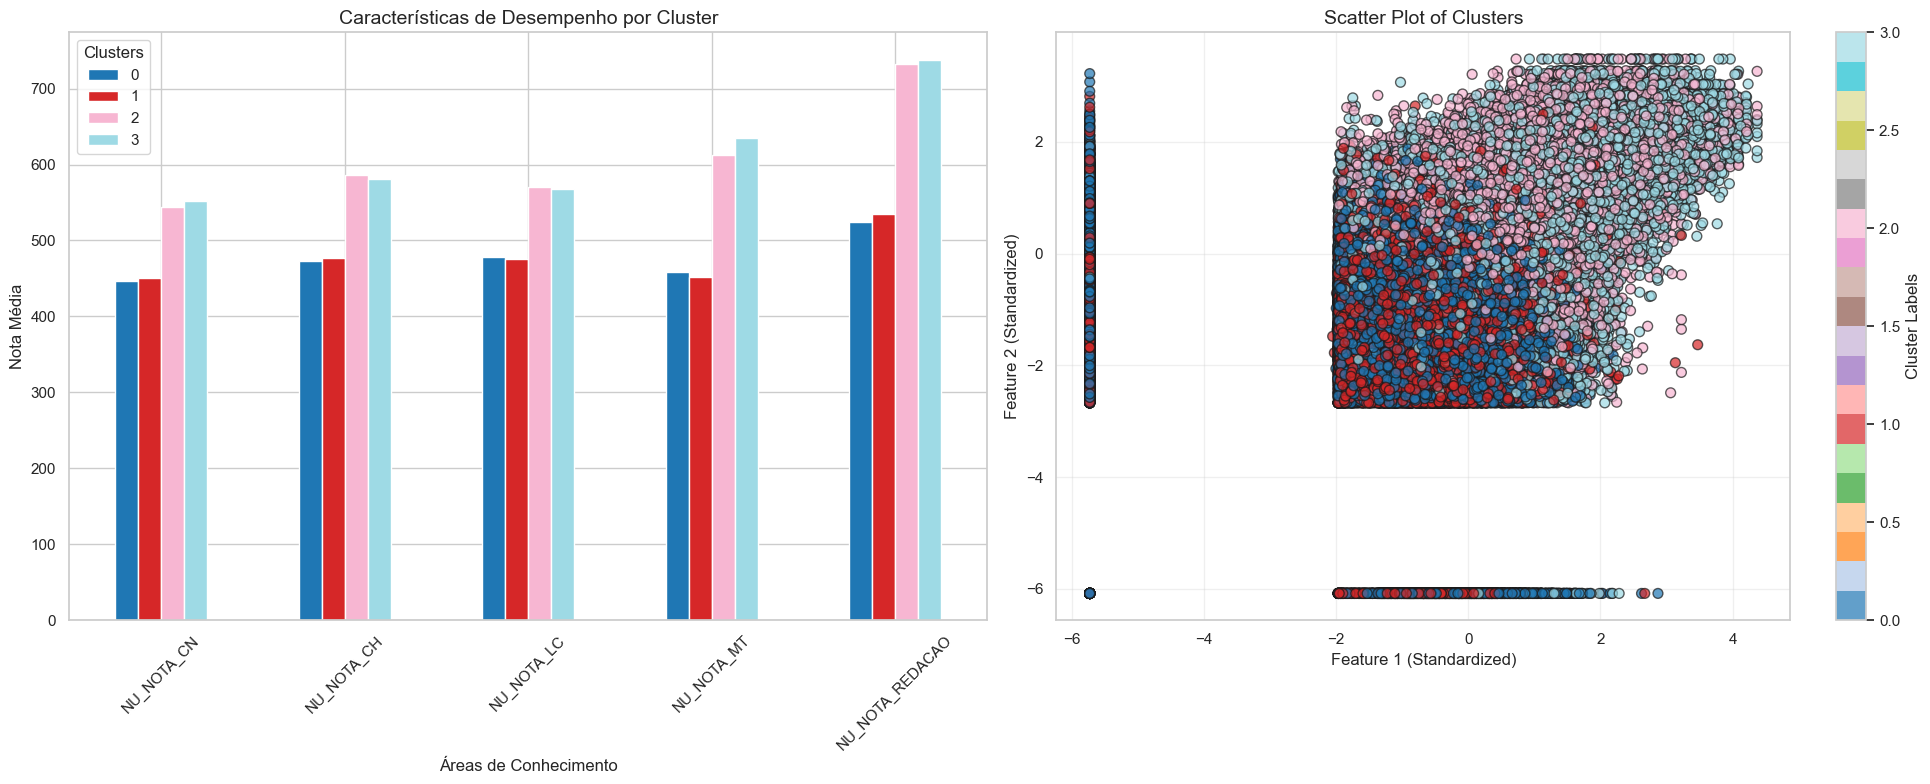

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

key_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
cluster_means = cluster_characteristics[key_features]

# Primeiro gráfico: Características de desempenho por cluster
cluster_means.T.plot(
    kind='bar', 
    ax=axes[0], 
    colormap='tab20', 
    legend=True
)
axes[0].set_title('Características de Desempenho por Cluster', fontsize=14)
axes[0].set_xlabel('Áreas de Conhecimento', fontsize=12)
axes[0].set_ylabel('Nota Média', fontsize=12)
axes[0].legend(title='Clusters', loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Segundo gráfico: Scatter Plot dos Clusters
scatter = axes[1].scatter(
    data_scaled[:, 0], 
    data_scaled[:, 1], 
    c=clusters, 
    cmap='tab20', 
    s=50, 
    alpha=0.7, 
    edgecolors='k'
)
axes[1].set_title('Scatter Plot of Clusters', fontsize=14)
axes[1].set_xlabel('Feature 1 (Standardized)', fontsize=12)
axes[1].set_ylabel('Feature 2 (Standardized)', fontsize=12)
cbar = fig.colorbar(scatter, ax=axes[1], label='Cluster Labels')
axes[1].grid(alpha=0.3)

plt.tight_layout()

plt.show()

## O modelo preditivo ficou muito pesado, irei desconsiderar por enquanto

In [ ]:
# # Step 3: Predictive Modeling
# # Selecting target variable and features for prediction
# target = 'NU_NOTA_MT'  # Predicting Math score as an example
# features = socioecon_columns + ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
# features.remove('Q005')
# data_model = data_mapped[features + [target]].dropna()

# data_model

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# X = data_model[features]
# y = data_model[target]

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# # Model Evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Step 4: Feature Importance Analysis
# feature_importance = pd.DataFrame({
#     'Feature': features,
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(f"Modelo Preditivo: MSE = {mse:.2f}, R² = {r2:.2f}")